# Projekt PRiAD Natalia Biernacka, Anton Libik
### Wybrany zbiór danych: Titanic Survival Prediction Dataset


### Pobranie i wczytanie danych

Import niezbędnych pakietów

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

pd.options.display.float_format = "{:.2f}".format 

In [2]:
import kagglehub
import os

# Download latest version
path = kagglehub.dataset_download("yasserh/titanic-dataset") 
print("Path to dataset files:", path)

file_path = os.path.join(path, 'Titanic-Dataset.csv')
dane = pd.read_csv(file_path)
dane.head()

Path to dataset files: C:\Users\Admin\.cache\kagglehub\datasets\yasserh\titanic-dataset\versions\1


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.00,1,0,A/5 21171,7.25,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.00,1,0,PC 17599,71.28,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.00,0,0,STON/O2. 3101282,7.92,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.00,1,0,113803,53.10,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.00,0,0,373450,8.05,NaN,S


### Analiza eksploracyjna

1) Wyznaczamy liczbę obiektów, liczbę atrybutów. Usuwamy kolumny PassengetId, Ticket i Name - nie są one potrzebne dla dalszej analizy.


In [3]:
# liczba obiektów
print("Liczba obiektów:", dane.shape[0])

# liczba atrybutów
print("Liczba atrybutow:", dane.shape[1])

# usuwanie kolumny PassengerId i Name
dane.drop(columns=['PassengerId'], inplace=True)
dane.drop(columns=['Name'], inplace=True)
dane.drop(columns=['Ticket'], inplace=True)

Liczba obiektów: 891
Liczba atrybutow: 12


2. Liczba obiektów, reprezentujących pasażerów, którzy przeżyli (atrybut survived ma 1) i którzy nie (survived = 0)

In [4]:
survivedDF = dane[dane.Survived == 1]

notSurvivedDF = dane[dane.Survived == 0]

print("Liczba pasażerów, którzy przeżyli: ", survivedDF.shape[0])
print("Liczba pasażerów, którzy nie przeżyli: ", notSurvivedDF.shape[0])

procent = survivedDF.shape[0] / dane.shape[0] * 100
print("Ile procent przeżyło: ", round(procent, 2), "%")

Liczba pasażerów, którzy przeżyli:  342
Liczba pasażerów, którzy nie przeżyli:  549
Ile procent przeżyło:  38.38 %


3. Liczba brakujących danych w poszczególnych kolumnach

In [5]:
dane.isnull().sum()

Survived      0
Pclass        0
Sex           0
Age         177
SibSp         0
Parch         0
Fare          0
Cabin       687
Embarked      2
dtype: int64

4. Usuwamy kolumnę "Cabin", ponieważ zawiera dużą liczbę brakujących danyh i będzie przeszkadać analizie. Zamiast brakujących danych w kolumnie "Age" wstawiamy dane średniego wieku.

In [6]:
# usuwamy kolumnę Cabin
dane.drop(columns=['Cabin'], inplace=True)

# wstawiamy średni wiek zamiast brakujących danych w kolumnie Age
dane['Age'] = dane['Age'].fillna(dane['Age'].median())

# sprawdzamy liczbę brakujących danych 
dane.isnull().sum()

Survived    0
Pclass      0
Sex         0
Age         0
SibSp       0
Parch       0
Fare        0
Embarked    2
dtype: int64

5. Usuwamy pozostałe brakujące dane

In [7]:
dane = dane.dropna()

dane.isnull().sum()

Survived    0
Pclass      0
Sex         0
Age         0
SibSp       0
Parch       0
Fare        0
Embarked    0
dtype: int64

6. Zbiór został przygotowany do analizy ekploracyjnej, ostateczna liczba obiektów i atrybutów:

In [8]:
# liczba obiektów
print("Liczba obiektów:", dane.shape[0])

# liczba atrybutów
print("Liczba atrybutow:", dane.shape[1])

Liczba obiektów: 889
Liczba atrybutow: 8


##### Analiza zmienności atrybutów bez odniesienia do przeżycia

       Survived  Pclass    Age  SibSp  Parch   Fare
count    889.00  889.00 889.00 889.00 889.00 889.00
mean       0.38    2.31  29.32   0.52   0.38  32.10
std        0.49    0.83  12.98   1.10   0.81  49.70
min        0.00    1.00   0.42   0.00   0.00   0.00
25%        0.00    2.00  22.00   0.00   0.00   7.90
50%        0.00    3.00  28.00   0.00   0.00  14.45
75%        1.00    3.00  35.00   1.00   0.00  31.00
max        1.00    3.00  80.00   8.00   6.00 512.33


<Axes: xlabel='Embarked', ylabel='Count'>

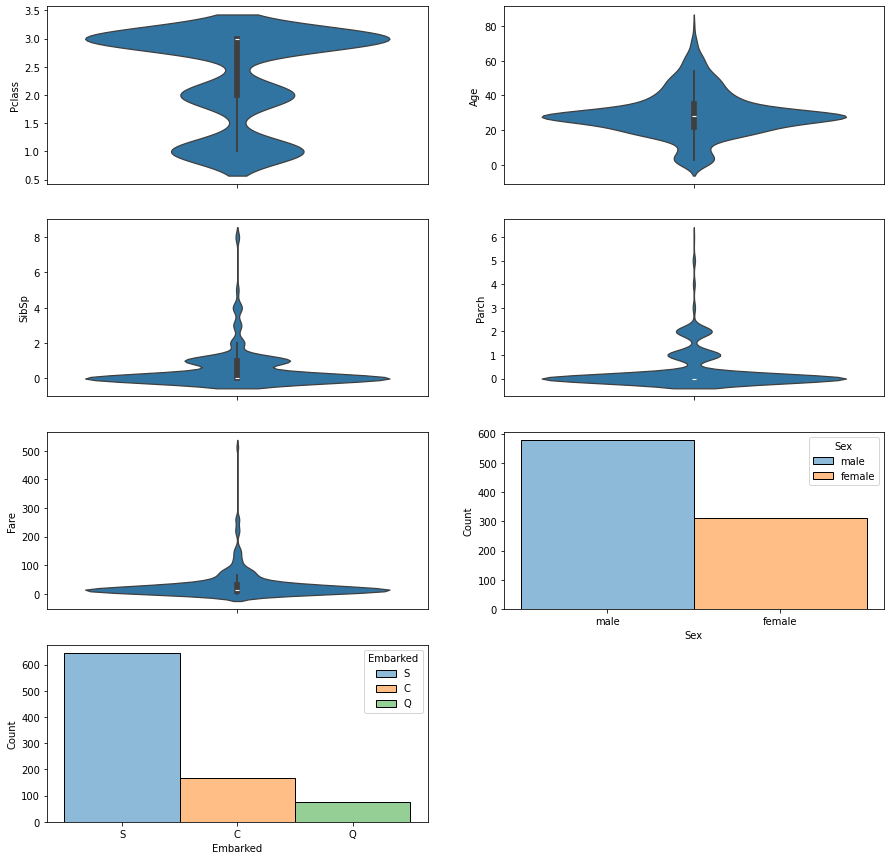

In [9]:
print(dane.describe())

plt.figure(figsize=(15,15))
plt.subplot(4,2,1)
sns.violinplot(data=dane['Pclass'])
plt.subplot(4,2,2)
sns.violinplot(data=dane['Age'])
plt.subplot(4,2,3)
sns.violinplot(data=dane['SibSp'])
plt.subplot(4,2,4)
sns.violinplot(data=dane['Parch'])
plt.subplot(4,2,5)
sns.violinplot(data=dane['Fare'])
plt.subplot(4,2,6)
sns.histplot(data=dane, x="Sex", hue="Sex")
plt.subplot(4,2,7)
sns.histplot(data=dane, x="Embarked", hue="Embarked")

##### Analiza zmienności atrybutów w zależności od przeżycia

       Survived  Pclass    Age  SibSp  Parch   Fare
count    549.00  549.00 549.00 549.00 549.00 549.00
mean       0.00    2.53  30.03   0.55   0.33  22.12
std        0.00    0.74  12.50   1.29   0.82  31.39
min        0.00    1.00   1.00   0.00   0.00   0.00
25%        0.00    2.00  23.00   0.00   0.00   7.85
50%        0.00    3.00  28.00   0.00   0.00  10.50
75%        0.00    3.00  35.00   1.00   0.00  26.00
max        0.00    3.00  74.00   8.00   6.00 263.00
       Survived  Pclass    Age  SibSp  Parch   Fare
count    340.00  340.00 340.00 340.00 340.00 340.00
mean       1.00    1.96  28.16   0.48   0.47  48.21
std        0.00    0.86  13.67   0.71   0.77  66.75
min        1.00    1.00   0.42   0.00   0.00   0.00
25%        1.00    1.00  21.00   0.00   0.00  12.44
50%        1.00    2.00  28.00   0.00   0.00  26.00
75%        1.00    3.00  35.00   1.00   1.00  56.95
max        1.00    3.00  80.00   4.00   5.00 512.33


<Axes: xlabel='Survived', ylabel='count'>

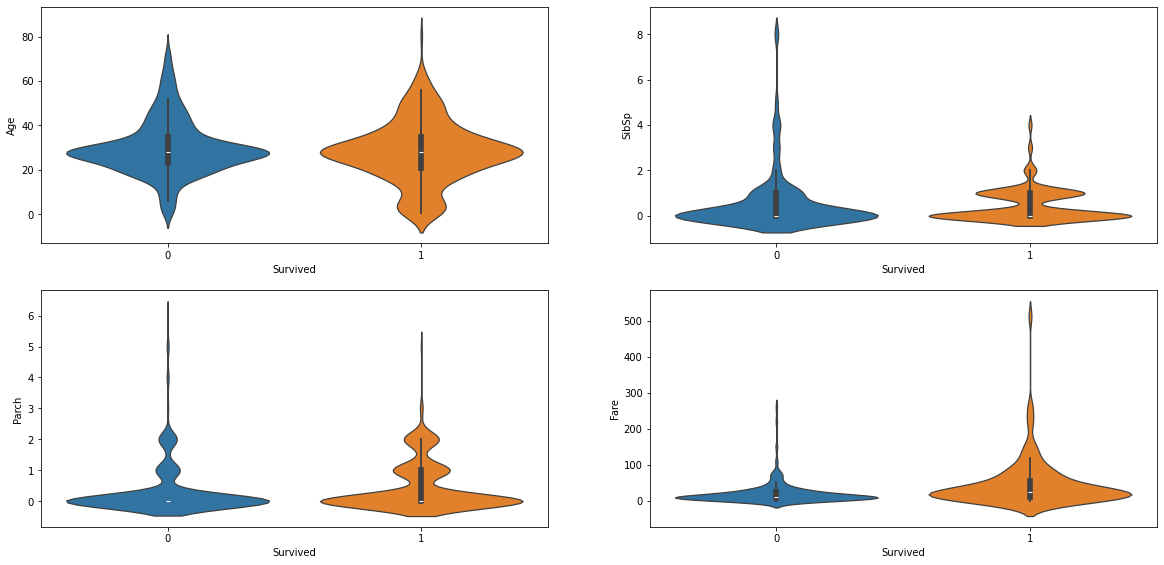

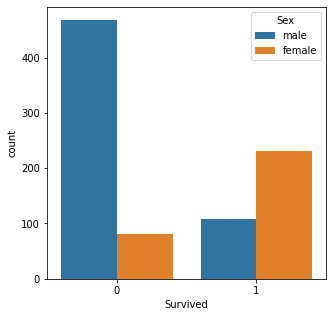

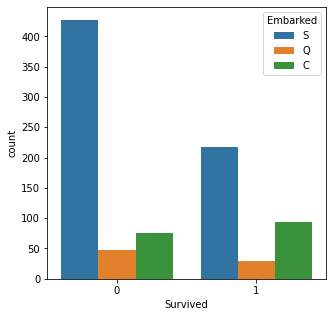

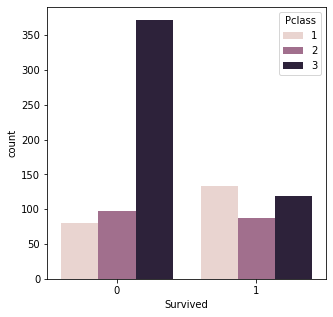

In [10]:
print(dane[dane['Survived'] == 0].describe())
print(dane[dane['Survived'] == 1].describe())
plt.figure(figsize= (20,20))
plt.subplot(4, 2, 1)
sns.violinplot(x = 'Survived', y = 'Age', data=dane, legend=False, hue = 'Survived')
plt.subplot(4, 2, 2)
sns.violinplot(x = 'Survived', y = 'SibSp', data=dane, legend=False, hue = 'Survived')
plt.subplot(4, 2, 3)
sns.violinplot(x = 'Survived', y = 'Parch', data=dane, legend=False, hue = 'Survived')
plt.subplot(4, 2, 4)
sns.violinplot(x = 'Survived', y = 'Fare', data=dane, legend=False, hue = 'Survived')
plt.figure(figsize= (5,5))
plt.xticks([0, 1])
sns.countplot(data=dane, x="Survived", hue="Sex")
plt.figure(figsize= (5,5))
plt.xticks([0, 1])
sns.countplot(data=dane, x="Survived", hue="Embarked")
plt.figure(figsize= (5,5))
plt.xticks([0, 1])
sns.countplot(data=dane, x="Survived", hue="Pclass")

Wnioski
* Rozkład wartości atrybutów Age, SibSp, Parch i Fare dla pasażerów, którzy przeżyli i nie przeżyli jest podobny. Możemy zaobserwować, że w przypadku grupy dzieci (wiek ok. 10 lat) oraz osób, których cena biletu wynosiła powyżej 100, większość przezyła
* Przeżywalność jest w dużym stopniu zależna od płci. Większość kobiet przeżyła, zaś znaczna większość mężczyzn zginęła.
* Port, z którego pasażer wszedł na pokład nie ma większego znaczenia.
* Na przeżywalność silnie wpłynęła klasa, w której podróżował pasażer - większość osób z klasy 1 przeżyła zaś z klasy 3 zdecydowana większość zginęła

##### Wykres punktowy

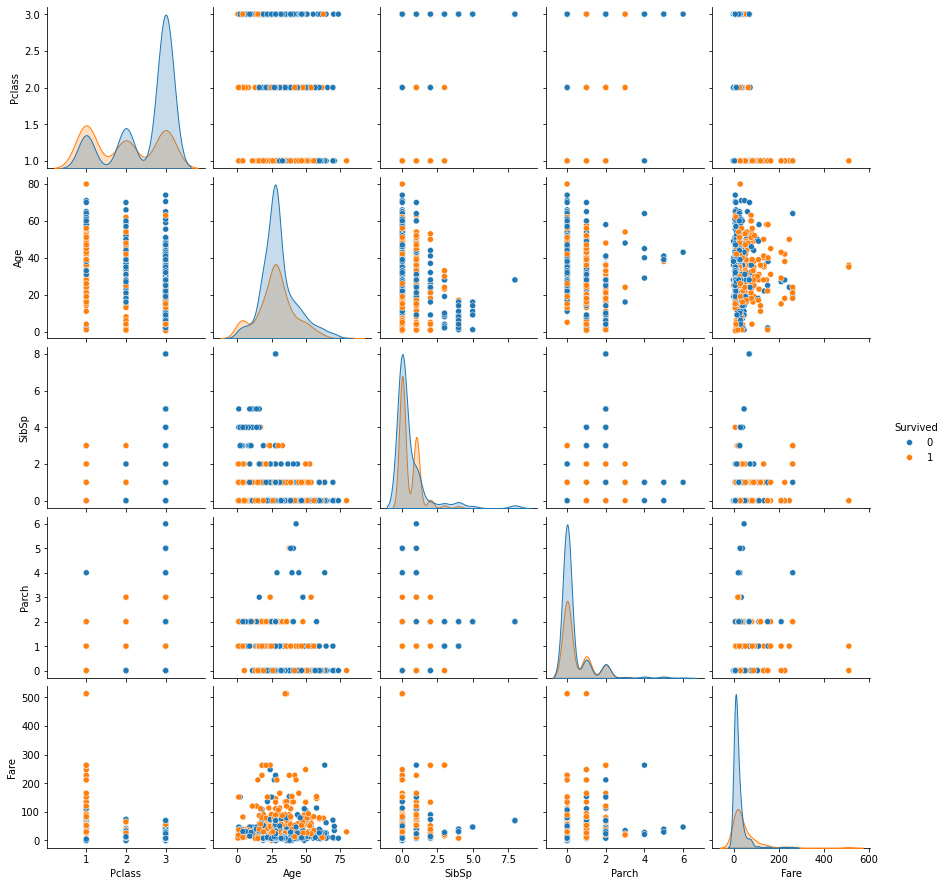

In [11]:
sns.pairplot(dane, kind = 'scatter', hue = "Survived")

##### Korelacja

          Survived  Pclass   Age  SibSp  Parch  Fare
Survived      1.00   -0.34 -0.07  -0.03   0.08  0.26
Pclass       -0.34    1.00 -0.34   0.08   0.02 -0.55
Age          -0.07   -0.34  1.00  -0.23  -0.17  0.09
SibSp        -0.03    0.08 -0.23   1.00   0.41  0.16
Parch         0.08    0.02 -0.17   0.41   1.00  0.22
Fare          0.26   -0.55  0.09   0.16   0.22  1.00


<Axes: >

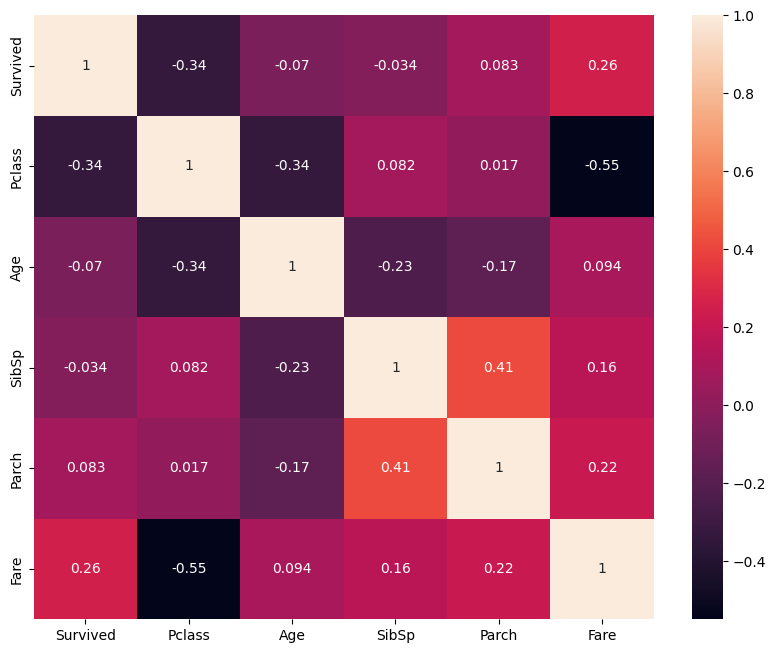

In [12]:
kor = dane.loc[:, np.logical_and(dane.columns != "Sex", dane.columns != "Embarked")].corr()
print(kor)
plt.figure(figsize=(10,8), dpi =100)
sns.heatmap(kor, annot=kor)

Wnioski:
* najsilniej skolerowane są cena biletu (Fare) oraz klasa (Pclass) - cena biletu wyższa dla klasy 1, nieco niższa dla klasy 2 i najniższa dla klasy 3
* z przeżywalnością (survived) najsilniej skolerowana jest klasa, co potwierdza wnioski z analizy zmienności atrybutów

### Uczenie nadzorowane

Żeby wygodniej było prowadzić uczenie nadzorowane, zamieniamy wartości column Sex i Embarked na wartości liczbowe według następnego schematu:  
Sex - (male => 1, female => 0),  
Emarked - (C => 1, S => 2, Q => 3)

In [13]:
print(dane.head())

dane['Sex'] = np.where(dane['Sex'] == 'male', 1, 0)
dane['Embarked'] = np.where(dane['Embarked'] == 'C', 1, dane['Embarked'])
dane['Embarked'] = np.where(dane['Embarked'] == 'S', 2, dane['Embarked'])
dane['Embarked'] = np.where(dane['Embarked'] == 'Q', 3, dane['Embarked'])

print(dane.head())

   Survived  Pclass     Sex   Age  SibSp  Parch  Fare Embarked
0         0       3    male 22.00      1      0  7.25        S
1         1       1  female 38.00      1      0 71.28        C
2         1       3  female 26.00      0      0  7.92        S
3         1       1  female 35.00      1      0 53.10        S
4         0       3    male 35.00      0      0  8.05        S
   Survived  Pclass  Sex   Age  SibSp  Parch  Fare Embarked
0         0       3    1 22.00      1      0  7.25        2
1         1       1    0 38.00      1      0 71.28        1
2         1       3    0 26.00      0      0  7.92        2
3         1       1    0 35.00      1      0 53.10        2
4         0       3    1 35.00      0      0  8.05        2


Wykres punktowy, który pozwoli na określenie, które atrybuty są bardziej, a które mniej istotne w kontekscie uczenia nadzorowanego

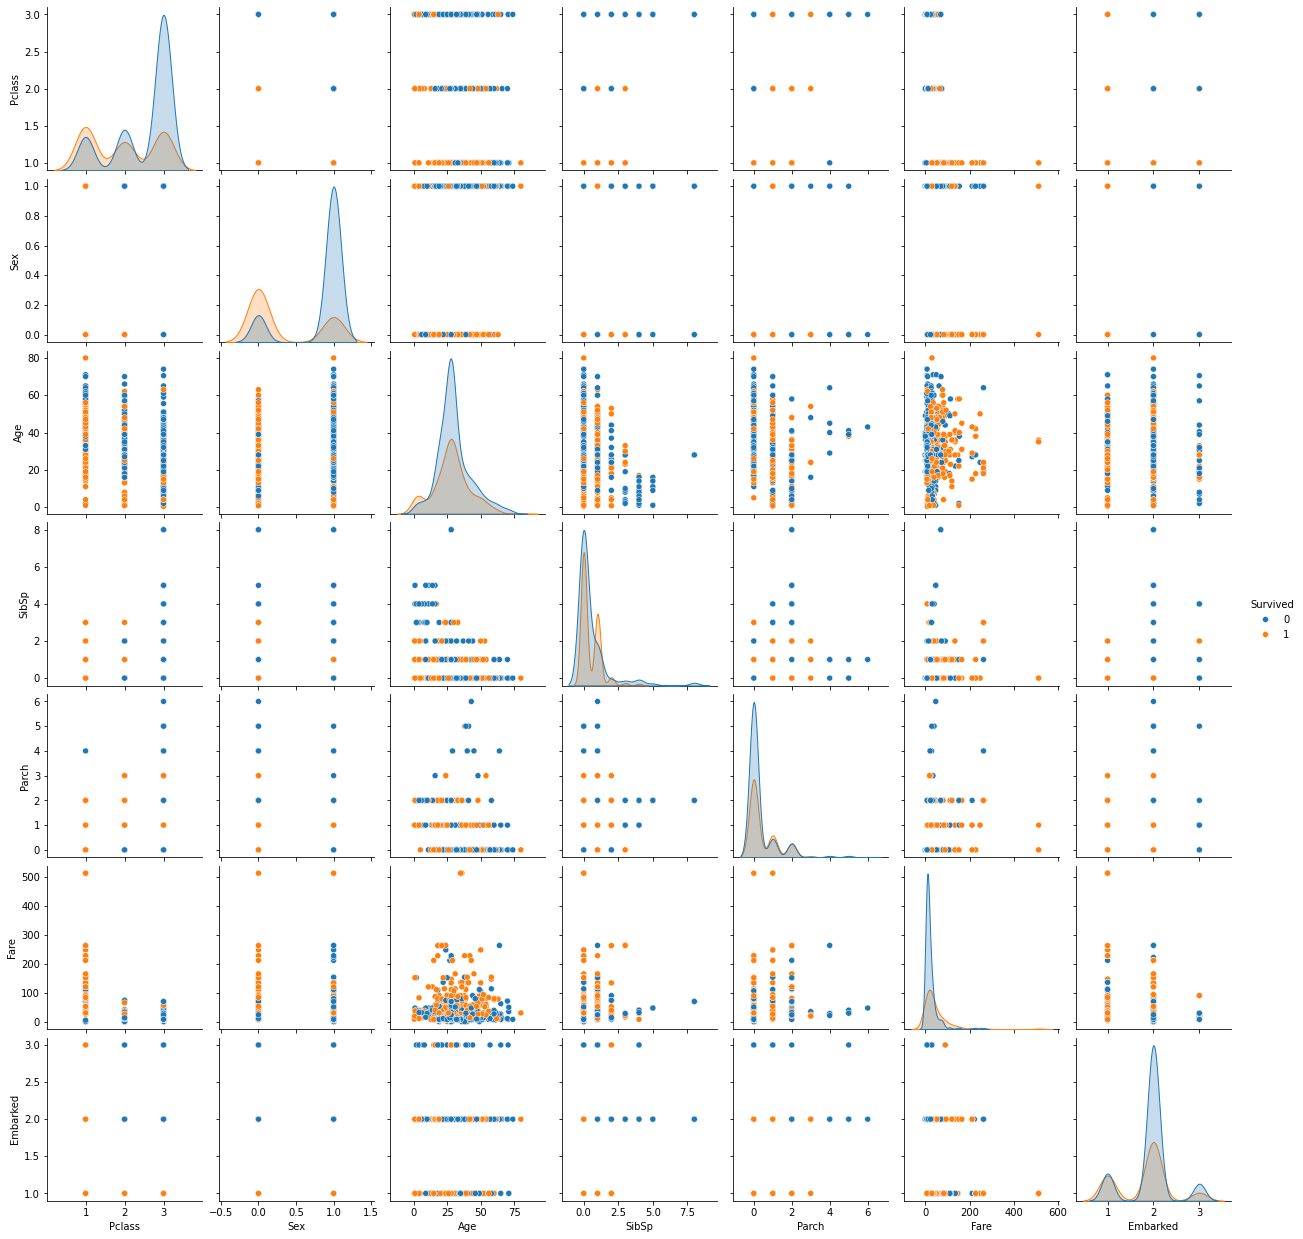

In [14]:
sns.pairplot(dane, kind = 'scatter', hue = "Survived")

Z wykresu punktowego możemy wyciągnąć wniosek, że najbardziej istotnymi dla nas będą pary atrybutów: Sex i Pclass, Pclass i Embarked, Sex i Age, Fare i Sex, Sex i Embarked

Import niezbędnych pakietów oraz funkcje dzielenia zbioru na ucząct i testowy, weryfikacji i wyświtlenia granic

In [15]:
# zdefiniowanie niezbędnych funkcji
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import confusion_matrix
from sklearn import metrics
from sklearn.neighbors import NearestNeighbors
from sklearn.neighbors import KNeighborsClassifier
from sklearn.neighbors import NearestCentroid
from sklearn.linear_model import LinearRegression
from sklearn import tree

def podziel(dane,proporcja):
    df = dane.copy()
    # for col in df.columns:
    #     if df[col].dtype == 'object':
    #         le = LabelEncoder()
    #         df[col] = le.fit_transform(df[col])
    X = df.drop('Survived', axis = 1)
    Y = df['Survived'].astype('category').cat.codes
    opis_ucz, opis_test, dec_ucz, dec_test = train_test_split(X, Y, test_size=proporcja)#, random_state=0)
    return {"opis_ucz":opis_ucz, "opis_test":opis_test, "dec_ucz":dec_ucz, "dec_test":dec_test}

def weryfikuj(model,dane,atryb):
    model.fit(dane["opis_ucz"].iloc[:,atryb], dane["dec_ucz"])
    wynik_ucz = model.predict(dane["opis_ucz"].iloc[:,atryb])
    wynik_test = model.predict(dane["opis_test"].iloc[:,atryb])
    mp = confusion_matrix(dane["dec_ucz"],wynik_ucz)
    print("macierz pomyłek - zbiór uczący, dokładność:",np.sum(np.diag(mp))/np.sum(mp))
    print(model.score(dane["opis_ucz"].iloc[:, atryb], dane["dec_ucz"]))
    print(mp)
    mp = confusion_matrix(dane["dec_test"],wynik_test)
    print("macierz pomyłek - zbiór testowy, dokładność:",np.sum(np.diag(mp))/np.sum(mp))
    print(model.score(dane["opis_ucz"].iloc[:, atryb], dane["dec_ucz"]))
    print(mp) 

def granice(model,dane,atr_x, atr_y,tytul,kontur = 1):
    # for col in dane["opis_ucz"].columns:
    #     if dane["opis_ucz"][col].dtype == 'object':
    #         le = LabelEncoder()
    #         dane["opis_ucz"][col] = le.fit_transform(dane["opis_ucz"][col])
    #         dane["opis_test"][col] = le.transform(dane["opis_test"][col])
    if (kontur == 1):    
        model.fit(np.array(dane["opis_ucz"].iloc[:,[atr_x,atr_y]]), np.array(dane["dec_ucz"]))
        x_min = min(dane["opis_ucz"].iloc[:, atr_x].min(),dane["opis_test"].iloc[:, atr_x].min())
        x_max = max(dane["opis_ucz"].iloc[:, atr_x].max(),dane["opis_test"].iloc[:, atr_x].max())
        y_min = min(dane["opis_ucz"].iloc[:, atr_y].min(),dane["opis_test"].iloc[:, atr_y].min())
        y_max = max(dane["opis_ucz"].iloc[:, atr_y].max(),dane["opis_test"].iloc[:, atr_y].max())
        rozst_x = x_max - x_min
        rozst_y = y_max - y_min
        x_min = x_min - 0.1*rozst_x
        x_max = x_max + 0.1*rozst_x
        y_min = y_min - 0.1*rozst_y
        y_max = y_max + 0.1*rozst_y       
        xx, yy = np.meshgrid(np.arange(x_min, x_max, (x_max-x_min)/150),
                     np.arange(y_min, y_max, (y_max-y_min)/150))
        Z = model.predict(np.c_[xx.ravel(), yy.ravel()])
        Z = Z.reshape(xx.shape)
    plt.figure(dpi = 100)
    plt.title(tytul)
    if (kontur == 1):
        plt.contourf(xx, yy, Z, levels = 4, alpha=0.2)
    plt.scatter(dane["opis_ucz"].iloc[:, atr_x], dane["opis_ucz"].iloc[:, atr_y], c=dane["dec_ucz"], marker = '.')
    plt.scatter(dane["opis_test"].iloc[:, atr_x], dane["opis_test"].iloc[:, atr_y], c=dane["dec_test"], marker = 'x')

Wybrane pary atrybutów dla uczenia nadzorowanego i podział zbioru danych

In [16]:
atrybuty = [ ['Sex', 'Pclass'], ['Pclass', 'Embarked'], ['Sex', 'Age'], ['Fare', 'Sex'], ['Sex', 'Embarked']]

# podział zbioru danych
dane_podzielone = podziel(dane,0.3)

Metoda k-najbliższych sąsiadów.

macierz pomyłek - zbiór uczący, dokładność: 0.797427652733119
0.797427652733119
[[326  57]
 [ 69 170]]
macierz pomyłek - zbiór testowy, dokładność: 0.7602996254681648
0.797427652733119
[[142  24]
 [ 40  61]]
macierz pomyłek - zbiór uczący, dokładność: 0.6446945337620579
0.6446945337620579
[[305  78]
 [143  96]]
macierz pomyłek - zbiór testowy, dokładność: 0.6367041198501873
0.6446945337620579
[[128  38]
 [ 59  42]]
macierz pomyłek - zbiór uczący, dokładność: 0.6897106109324759
0.6897106109324759
[[243 140]
 [ 53 186]]
macierz pomyłek - zbiór testowy, dokładność: 0.6554307116104869
0.6897106109324759
[[108  58]
 [ 34  67]]
macierz pomyłek - zbiór uczący, dokładność: 0.8987138263665595
0.8987138263665595
[[363  20]
 [ 43 196]]
macierz pomyłek - zbiór testowy, dokładność: 0.7415730337078652
0.8987138263665595
[[134  32]
 [ 37  64]]
macierz pomyłek - zbiór uczący, dokładność: 0.7443729903536977
0.7443729903536977
[[278 105]
 [ 54 185]]
macierz pomyłek - zbiór testowy, dokładność: 0.7453183

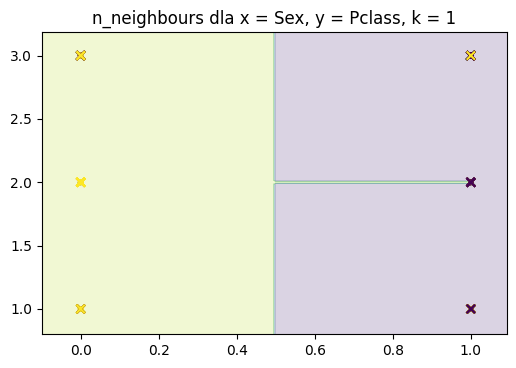

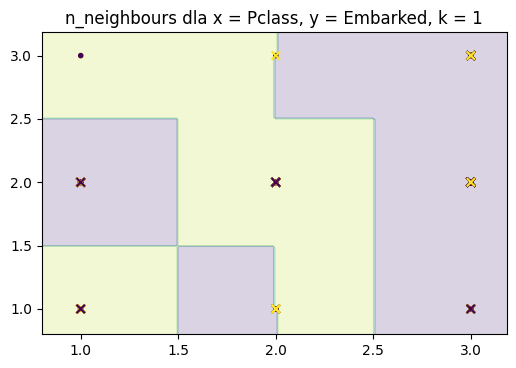

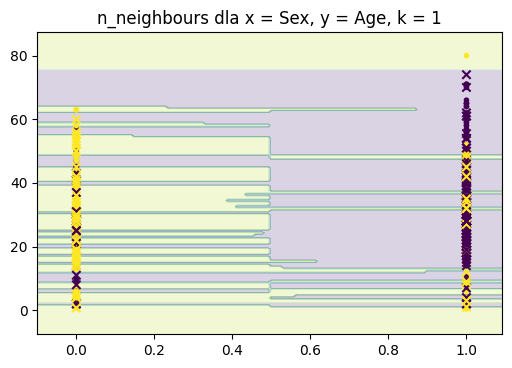

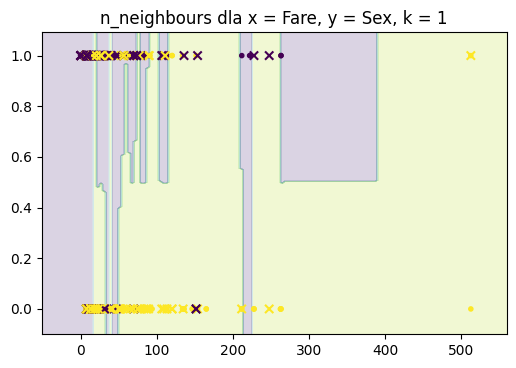

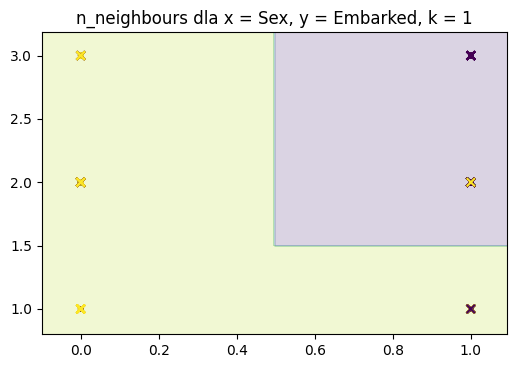

In [17]:
#wybór liczby sąsiadów
k = 1

# zdefiniowanie modelu klasyfikatora
model = KNeighborsClassifier(n_neighbors=k)

for aktualne_atrybuty in atrybuty:
    atrybut_1  = aktualne_atrybuty[0]
    atrybut_2 = aktualne_atrybuty[1]

    atrybut_1_index = dane.columns.get_loc(atrybut_1) - 1
    atrybut_2_index = dane.columns.get_loc(atrybut_2) - 1

    # zdefiniowanie modelu klasyfikatora
    model = KNeighborsClassifier(n_neighbors=k)

    # weryfikacja
    weryfikuj(model,dane_podzielone,[atrybut_1_index,atrybut_2_index])

    granice(model, dane_podzielone, atrybut_1_index, atrybut_2_index, "n_neighbours dla x = " + atrybut_1 + ", y = " + atrybut_2 + ", k = " + str(k))

Naiwny klasyfikator Bayesa

macierz pomyłek - zbiór uczący, dokładność: 0.797427652733119
0.797427652733119
[[326  57]
 [ 69 170]]
macierz pomyłek - zbiór testowy, dokładność: 0.7602996254681648
0.797427652733119
[[142  24]
 [ 40  61]]
macierz pomyłek - zbiór uczący, dokładność: 0.6736334405144695
0.6736334405144695
[[320  63]
 [140  99]]
macierz pomyłek - zbiór testowy, dokładność: 0.6966292134831461
0.6736334405144695
[[140  26]
 [ 55  46]]
macierz pomyłek - zbiór uczący, dokładność: 0.797427652733119
0.797427652733119
[[326  57]
 [ 69 170]]
macierz pomyłek - zbiór testowy, dokładność: 0.7602996254681648
0.797427652733119
[[142  24]
 [ 40  61]]
macierz pomyłek - zbiór uczący, dokładność: 0.7958199356913184
0.7958199356913184
[[320  63]
 [ 64 175]]
macierz pomyłek - zbiór testowy, dokładność: 0.7453183520599251
0.7958199356913184
[[136  30]
 [ 38  63]]
macierz pomyłek - zbiór uczący, dokładność: 0.797427652733119
0.797427652733119
[[326  57]
 [ 69 170]]
macierz pomyłek - zbiór testowy, dokładność: 0.760299625468

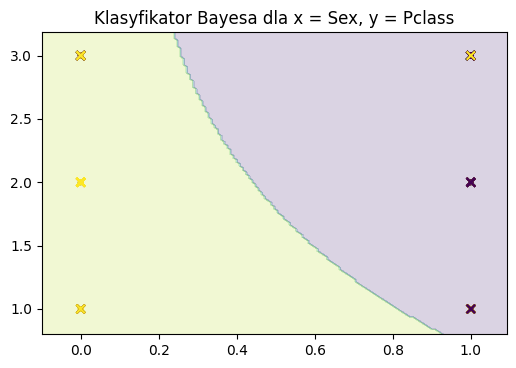

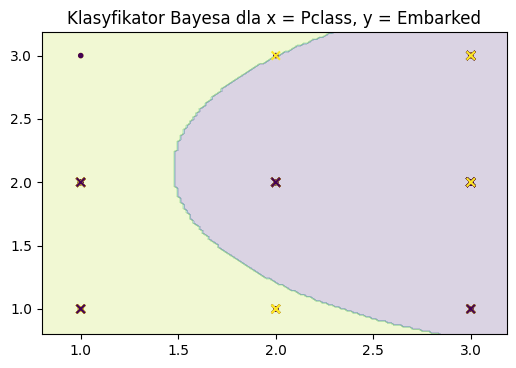

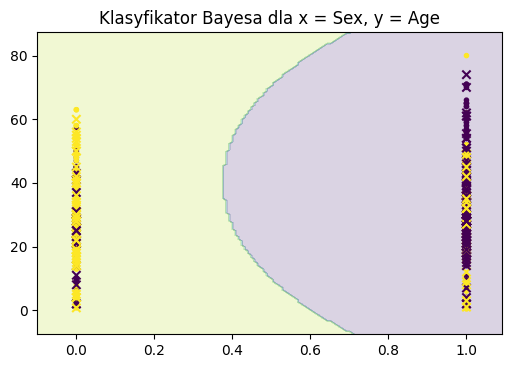

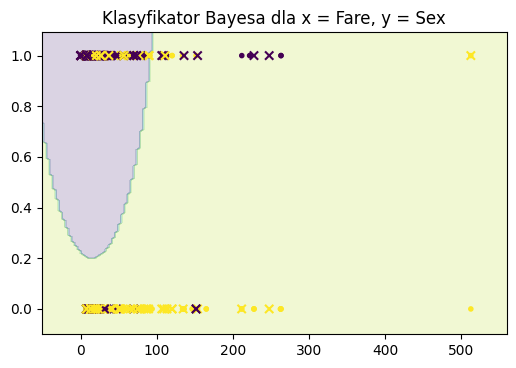

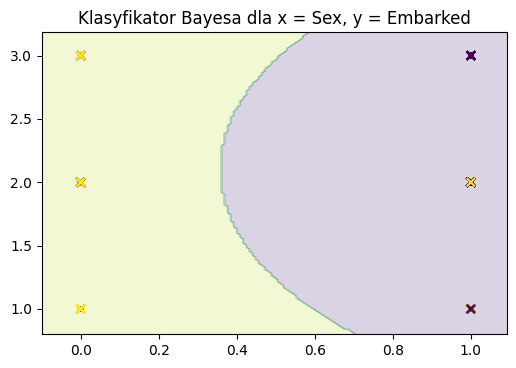

In [18]:
# zdefiniowanie modelu klasyfikatora
model = KNeighborsClassifier(n_neighbors=k)

for aktualne_atrybuty in atrybuty:
    atrybut_1  = aktualne_atrybuty[0]
    atrybut_2 = aktualne_atrybuty[1]

    atrybut_1_index = dane.columns.get_loc(atrybut_1) - 1
    atrybut_2_index = dane.columns.get_loc(atrybut_2) - 1

    # zdefiniowanie modelu klasyfikatora
    model = GaussianNB()

    # weryfikacja
    weryfikuj(model,dane_podzielone,[atrybut_1_index,atrybut_2_index])

    granice(model, dane_podzielone, atrybut_1_index, atrybut_2_index, "Klasyfikator Bayesa dla x = " + atrybut_1 + ", y = " + atrybut_2)

### Osobny model Bayesa dla kobiet i mężczyzn

In [39]:
# zdefiniowanie niezbędnych funkcji
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import confusion_matrix
from sklearn import metrics

def podziel(dane,proporcja):
    df = dane.copy()
    # for col in df.columns:
    #     if df[col].dtype == 'object':
    #         le = LabelEncoder()
    #         df[col] = le.fit_transform(df[col])
    X = df.drop('Survived', axis = 1)
    Y = df['Survived'].astype('category').cat.codes
    opis_ucz, opis_test, dec_ucz, dec_test = train_test_split(X, Y, test_size=proporcja)#, random_state=0)
    return {"opis_ucz":opis_ucz, "opis_test":opis_test, "dec_ucz":dec_ucz, "dec_test":dec_test}

def weryfikuj(model,dane,atryb):
    model.fit(dane["opis_ucz"].iloc[:,atryb], dane["dec_ucz"])
    wynik_ucz = model.predict(dane["opis_ucz"].iloc[:,atryb])
    wynik_test = model.predict(dane["opis_test"].iloc[:,atryb])
    mp = confusion_matrix(dane["dec_ucz"],wynik_ucz)
    print("macierz pomyłek - zbiór uczący, dokładność:",np.sum(np.diag(mp))/np.sum(mp))
    score1 = model.score(dane["opis_ucz"].iloc[:, atryb], dane["dec_ucz"])
    print(score1)
    print(mp)
    mp = confusion_matrix(dane["dec_test"],wynik_test)
    print("macierz pomyłek - zbiór testowy, dokładność:",np.sum(np.diag(mp))/np.sum(mp))
    score2 = model.score(dane["opis_test"].iloc[:, atryb], dane["dec_test"])
    print(score2)
    print(mp) 
    return [score1, score2]

def dokladnosc(model,dane,atryb):
    model.fit(dane["opis_ucz"].iloc[:,atryb], dane["dec_ucz"])
    wynik_ucz = model.predict(dane["opis_ucz"].iloc[:,atryb])
    wynik_test = model.predict(dane["opis_test"].iloc[:,atryb])
    score1 = model.score(dane["opis_ucz"].iloc[:, atryb], dane["dec_ucz"])
    score2 = model.score(dane["opis_test"].iloc[:, atryb], dane["dec_test"])
    return [score1, score2]

def granice(model,dane,atr_x, atr_y,tytul,kontur = 1):
    # for col in dane["opis_ucz"].columns:
    #     if dane["opis_ucz"][col].dtype == 'object':
    #         le = LabelEncoder()
    #         dane["opis_ucz"][col] = le.fit_transform(dane["opis_ucz"][col])
    #         dane["opis_test"][col] = le.transform(dane["opis_test"][col])
    if (kontur == 1):    
        model.fit(np.array(dane["opis_ucz"].iloc[:,[atr_x,atr_y]]), np.array(dane["dec_ucz"]))
        x_min = min(dane["opis_ucz"].iloc[:, atr_x].min(),dane["opis_test"].iloc[:, atr_x].min())
        x_max = max(dane["opis_ucz"].iloc[:, atr_x].max(),dane["opis_test"].iloc[:, atr_x].max())
        y_min = min(dane["opis_ucz"].iloc[:, atr_y].min(),dane["opis_test"].iloc[:, atr_y].min())
        y_max = max(dane["opis_ucz"].iloc[:, atr_y].max(),dane["opis_test"].iloc[:, atr_y].max())
        rozst_x = x_max - x_min
        rozst_y = y_max - y_min
        x_min = x_min - 0.1*rozst_x
        x_max = x_max + 0.1*rozst_x
        y_min = y_min - 0.1*rozst_y
        y_max = y_max + 0.1*rozst_y       
        xx, yy = np.meshgrid(np.arange(x_min, x_max, (x_max-x_min)/150),
                     np.arange(y_min, y_max, (y_max-y_min)/150))
        Z = model.predict(np.c_[xx.ravel(), yy.ravel()])
        Z = Z.reshape(xx.shape)
    plt.figure(dpi = 100)
    plt.title(tytul)
    if (kontur == 1):
        plt.contourf(xx, yy, Z, levels = 4, alpha=0.2)
    plt.scatter(dane["opis_ucz"].iloc[:, atr_x], dane["opis_ucz"].iloc[:, atr_y], c=dane["dec_ucz"], marker = '.')
    plt.scatter(dane["opis_test"].iloc[:, atr_x], dane["opis_test"].iloc[:, atr_y], c=dane["dec_test"], marker = 'x')

Wykonano kilka pdziałów na zbiór testowy i uczący
bez uwzględnienia płci
Atrybuty: Pclass, Embarked
Weryfikacja klasyfikacji dla jednego z podziałów
macierz pomyłek - zbiór uczący, dokładność: 0.6752411575562701
0.6752411575562701
[[313  64]
 [138 107]]
macierz pomyłek - zbiór testowy, dokładność: 0.6891385767790262
0.6891385767790262
[[148  24]
 [ 59  36]]
Uśredniona dokładność dla zbioru uczącego: 0.6816720257234726
Uśredniona dokładność dla zbioru testowego: 0.6741573033707865

z uwzględnieniem płci
Atrybuty: Sex, Pclass
Weryfikacja klasyfikacji dla jednego z podziałów
macierz pomyłek - zbiór uczący, dokładność: 0.7893890675241158
0.7893890675241158
[[322  54]
 [ 77 169]]
macierz pomyłek - zbiór testowy, dokładność: 0.7790262172284644
0.7790262172284644
[[146  27]
 [ 32  62]]
Uśredniona dokładność dla zbioru uczącego: 0.7813504823151126
Uśredniona dokładność dla zbioru testowego: 0.797752808988764

z uwzględnieniem płci
Atrybuty: Sex, Embarked
Weryfikacja klasyfikacji dla jednego z 

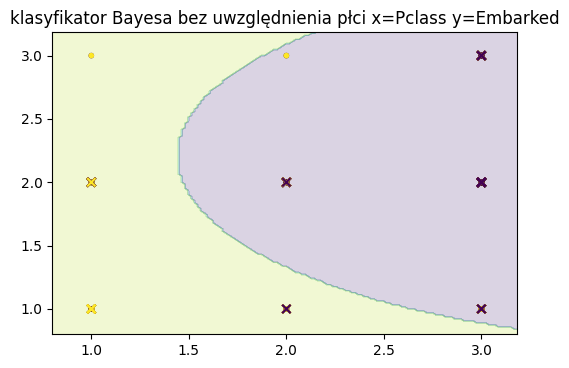

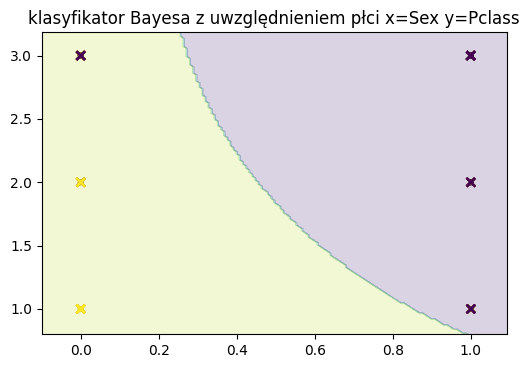

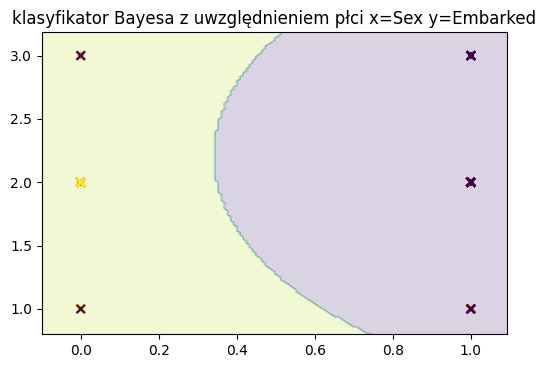

In [46]:
def show_output1(dane, a1, a2, klasyfikator, name):
    print(name)
    pom1 = 0
    pom2 = 0
    n=3
    for i in range(n):
        d = podziel(dane, 0.3)
        model = GaussianNB()
        [s1, s2] = dokladnosc(model,d,[a1,a2])
        pom1=pom1+s1
        pom2=pom2+s2
    print("Atrybuty: "+str(d["opis_ucz"].columns[a1])+", "+str(d["opis_ucz"].columns[a2]))
    print("Weryfikacja klasyfikacji dla jednego z podziałów")
    weryfikuj(model,d,[a1,a2])
    print("Uśredniona dokładność dla zbioru uczącego:", pom1/n)
    print("Uśredniona dokładność dla zbioru testowego:", pom2/n)
    print()
    granice(model,d,a1,a2,"klasyfikator "+klasyfikator+" "+str(name)+" x="+str(d["opis_ucz"].columns[a1])+" y="+str(d["opis_ucz"].columns[a2]))

print("Wykonano kilka pdziałów na zbiór testowy i uczący")
a1=0
a2=6
show_output1(dane, a1,a2, "Bayesa","bez uwzględnienia płci")
show_output1(dane, 1,a1, "Bayesa","z uwzględnieniem płci")
show_output1(dane, 1,a2, "Bayesa","z uwzględnieniem płci")



dla kobiet
Atrybuty: Pclass, Embarked
Weryfikacja klasyfikacji dla jednego z podziałów
macierz pomyłek - zbiór uczący, dokładność: 0.7889908256880734
0.7889908256880734
[[ 46  11]
 [ 35 126]]
macierz pomyłek - zbiór testowy, dokładność: 0.7021276595744681
0.7021276595744681
[[18  6]
 [22 48]]
Uśredniona dokładność dla zbioru uczącego: 0.7874617737003059
Uśredniona dokładność dla zbioru testowego: 0.7588652482269502

dla mężczyzn
Atrybuty: Pclass, Embarked
Weryfikacja klasyfikacji dla jednego z podziałów
macierz pomyłek - zbiór uczący, dokładność: 0.8114143920595533
0.8114143920595533
[[316  19]
 [ 57  11]]
macierz pomyłek - zbiór testowy, dokładność: 0.764367816091954
0.764367816091954
[[127   6]
 [ 35   6]]
Uśredniona dokładność dla zbioru uczącego: 0.8023159636062861
Uśredniona dokładność dla zbioru testowego: 0.7854406130268199



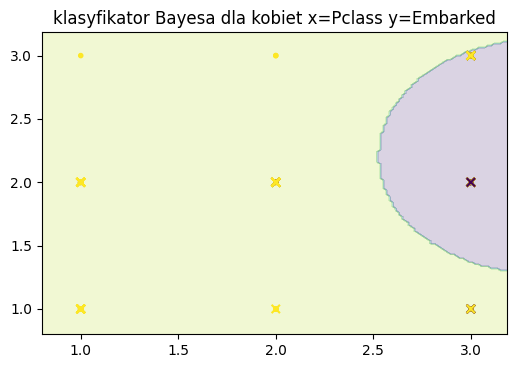

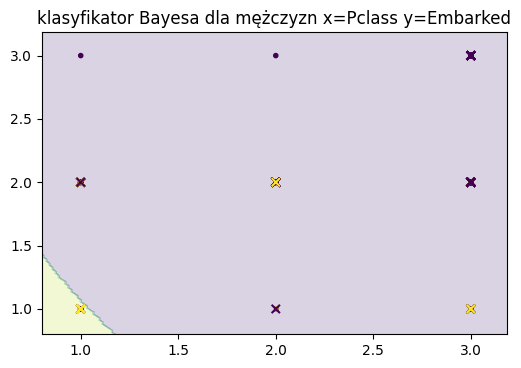

In [45]:
a1=0
a2=5
show_output1(dane[dane['Sex']==0].drop('Sex', axis=1),a1,a2,"Bayesa", "dla kobiet")
show_output1(dane[dane['Sex']==1].drop('Sex', axis=1),a1,a2,"Bayesa", "dla mężczyzn")


Wnioski:
* Otrzymane wyniki pokazują, że płeć jest kluczowym czynnikiem wpływającym na przeżycie na Titanicu - kobiety miały większe szanse na przeżycie
* Dokładność klasyfikacji w przypadku, gdy uwzględniamy atrybut płeć jest wyższa o ok. 0,1.
* Analiza przeprowadzona osobno dla kobiet i mężczyzn pozwoliła na lepsze wychwycenie zależności specyficznych dla danej grupy. Np. Przeżywalność dla mężczyzn była bardziej ograniczona ze względu na pierwszeństwo ratowania kobiet i dzieci, więc w większym stopniu zależało m.in. od klasy
